In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df = pd.read_csv('Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv', low_memory=False)

del df['Timestamp'] 

df['keep'] = df.iloc[:, 0:-1].apply(
    lambda row: pd.to_numeric(row, errors='coerce').notnull().all(),
    axis=1
)

df = df.replace([np.inf, -np.inf], np.nan)
df = df[df['keep']]
del df['keep']

df = df.dropna()
df = df.reset_index(drop=True)

df.shape

(1040548, 79)

In [2]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values #features
y = df.iloc[:, 78].values #label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=1000)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [3]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9999839828295933


In [4]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=list(df.columns)[:-1]).sort_values(ascending=False)
pd.set_option('display.max_rows', None)
feature_imp

Fwd Seg Size Min     0.244268
Init Fwd Win Byts    0.088469
Flow IAT Max         0.034234
Dst Port             0.031175
Bwd IAT Max          0.029462
Fwd Header Len       0.025272
Flow Duration        0.021832
Fwd IAT Tot          0.021446
Flow IAT Mean        0.020037
Flow Pkts/s          0.019955
Fwd Pkts/s           0.018741
Bwd Pkt Len Max      0.017670
Flow IAT Min         0.016941
Pkt Len Max          0.016769
Tot Fwd Pkts         0.015818
Bwd Header Len       0.015358
Fwd IAT Mean         0.015253
Bwd IAT Mean         0.014764
Fwd Pkt Len Max      0.014561
Fwd IAT Max          0.014531
TotLen Bwd Pkts      0.014444
Flow IAT Std         0.014204
Bwd IAT Min          0.013745
Pkt Len Var          0.013512
Fwd IAT Min          0.012724
Subflow Bwd Byts     0.012180
Bwd Pkt Len Std      0.012100
Pkt Len Std          0.011086
ACK Flag Cnt         0.010165
Subflow Fwd Pkts     0.009993
Tot Bwd Pkts         0.009826
Subflow Bwd Pkts     0.009717
PSH Flag Cnt         0.009709
Active Mea

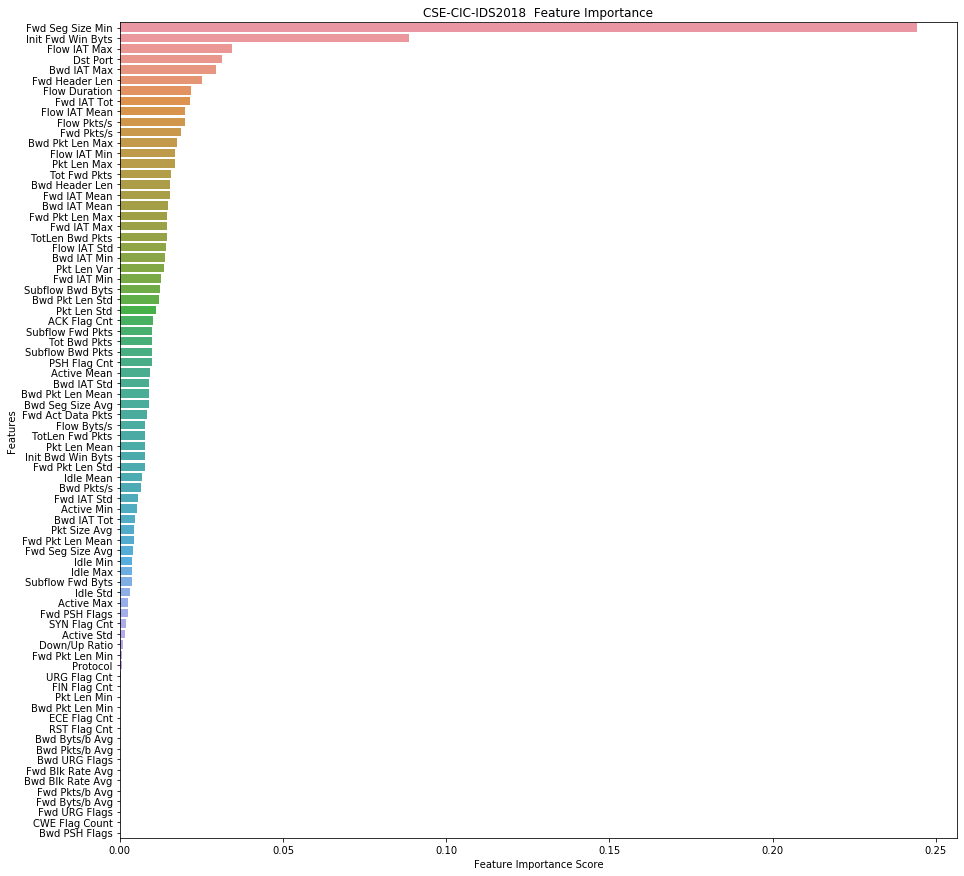

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("CSE-CIC-IDS2018  Feature Importance")
plt.show()